# Logistic regression 罗杰斯蒂回归

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import metrics as mc

## Model：


$$
P(y|x)=\frac {1} {1+e^{-y(w^T x + b)}} 
$$

$$
\text{where  }y\in \{-1,1\}
$$

## Strategy: Maximum likelihood estimation


Sigmoid 函数：

$$
S(x)=\frac {1} {1+e^{-x}}
$$
$$
S'(x)=S(x)[1-S(x)]=S(x)S(-x)
$$

另  $z= y(w^T x +b)$  ,则

$$
P(y|x)=S(z)
$$

最大似然函数

$$
\begin{aligned}
L(w,b)&=P(Y|X;{w,b}) \\
&=\prod_{n=1}^N {P(y_n|x_n;w,b)} \\
&=\prod_{n=1}^N S(z_n)
\end{aligned}
$$

对似然函数两边取对数得

$$
\begin{aligned}
lnL(w,b)&=\sum_{i=1}^N {ln[S(z_n)]} \\
\nabla_w lnL(w,b)&=\sum_{i=1}^N {S(-z_n) y_n x_n} \\
\nabla_b lnL(w,b)&=\sum_{i=1}^N {S(-z_n) y_n} 
\end{aligned}
$$

即优化问题

$$
\min_{w,b} \quad -\sum_{i=1}^N {ln[S(z_n)]}
$$

## Algorithm: Gradient Descent

$$
x^{i+1}=x^i-\eta \times \nabla_x f(x)|_{x=x^i}
$$

$$
when\ \ i\to\infty\quad x=arg \min_x f(x)
$$

In [89]:
def minimize_GD(
    fun, dfun, x0, tol=1e-4, eta=0.05, gamma=0.1, maxIter=100000, plot=False
):
    """梯度下降法 最小化
    args:
        fun：目标函数 fun(array x):return valve
        dfun: 目标函数梯度函数 g(array x):return array.like(x.shape())
        x0：起始点
        tol：误差范围 ||f'(x)||<tol
        eta: 初始学习率
        gammma: 学习率衰减 每1000次 eta = gamma*eta
        maxIter：最大迭代次数
    return:
        dict
    """
    cnt = 0
    lrd_cnt = 0  # count for learning rate decay
    x = x0
    g = dfun(x)
    f = []
    while np.linalg.norm(g) > tol and cnt < maxIter:
        # 以梯度范数效于误差，作为结束条件
        f.append(fun(x))

        x = x - eta * g
        g = dfun(x)
        cnt += 1
        lrd_cnt += 1
        if lrd_cnt >= 10000:
            lrd_cnt = 0
            eta = eta * gamma

    if plot:
        fig = plt.figure()
        plt.xlabel("iter")
        plt.ylabel("fun(x)")
        plt.plot(f)

    return {"目标函数最小值": fun(x), "参数": x, "迭代次数": cnt, "成功与否": np.linalg.norm(g) <= tol}

{'目标函数最小值': 2.25956612728179e-09,
 '参数': array([ 1.99997459,  2.99996189, -0.9999873 ]),
 '迭代次数': 107,
 '成功与否': True}

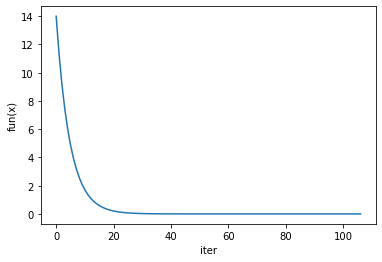

In [90]:
# 测试 minimization_GD
fun = lambda x: (x[0] - 2) ** 2 + (x[1] - 3) ** 2 + (x[2] + 1) ** 2
dfun = lambda x: np.array([2 * x[0] - 4, 2 * x[1] - 6, 2 * x[2] + 2])
x0 = np.zeros(3)
minimize_GD(fun, dfun, x0, plot=True)

为了方便运算将 b 并入 w 中，即在 x 后添加一个 1

$$
lnL(w)=\sum_{i=1}^N {ln[S(z_n)]}
$$
$$
\nabla_w lnL(w)=\sum_{i=1}^N {S(-z_n) y_n x_n}
$$

目标函数为

$$
-\frac 1 N lnL(w)=-\frac 1 N \sum_{i=1}^N {ln[S(z_n)]}
$$

目标函数梯度函数为

$$
-\frac 1 N \nabla_w lnL(w)=-\frac 1 N \sum_{i=1}^N {S(-z_n) y_n x_n}
$$

In [60]:
def Sigmod(x): return 1/(1+np.exp(-x))  # 定义Sigmoid函数

In [61]:
# 读入数据 
from sklearn.datasets import load_iris
from random import shuffle
iris = load_iris()
X = iris.data[0:100]
Y = iris.target[0:100]
Y = Y*2-1  # 原数据的标签是0，1，这里处理成 -1，1
order = [i for i in range(0, 100)]
shuffle(order)
X, Y = X[order], Y[order]  # 乱序
N = 50
x, y = X[:N], Y[:N]  # 前N个作为训练集

{'目标函数最小值': 0.00012004471288622235,
 '参数': array([-1.59849899e+00, -4.01810881e+00,  6.68480456e+00,  3.99091951e+00,
         1.05909893e-03]),
 '迭代次数': 112297,
 '成功与否': True}

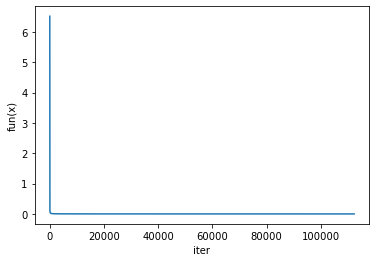

In [104]:
# 批量梯度下降法 BGD
x_1 = np.concatenate((x, np.ones((N, 1))), axis=1)  # X 后面添加一排 1

fun = lambda w: -1 / N * (np.log(Sigmod(y * (w@x_1.T)))).sum()
dfun = lambda w: -1 / N * (((Sigmod(-y * (w@x_1.T)))*y)@x_1)

w0 = np.ones(5)
res = minimize_GD(fun, dfun, w0, eta=0.1, gamma=1.0, tol=1e-4, maxIter=10000000, plot=True)
res

|初始学习率|学习率衰减值|误差|迭代次数|最小值|注释|
|------:|------:|------:|-------:|------:|------:|
|0.01   |1.0    |1e-4   | 1123005|1.20045e-04|无衰减|
| 0.1   |1.0    |1e-4   |  112297|1.20045e-04|无衰减|
| 0.1   |1.0    |1e-5   | 1209564|1.25849e-05|无衰减|
| 0.1   |0.99   |1e-5   |    NULL|       NULL|失败  |

一有衰减就失败，似乎梯度下降法不太适合学习率衰减

In [99]:
# 测试一下
def decifun(x):
    return 2 * Sigmod(np.inner(x, wb[:-1]) + wb[-1]) - 1

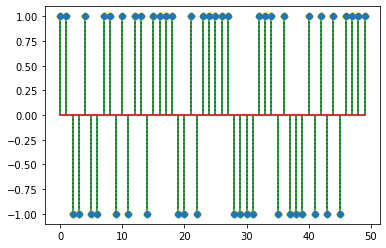

In [105]:
wb = res["参数"]
clfRes = decifun(X[N:])
plt.stem(Y[N:], use_line_collection=True, linefmt="b:", markerfmt="yD")
plt.stem(clfRes, use_line_collection=True, linefmt="g-")
plt.show()

In [108]:
# 用 scipy.optimize.minimize 来作为对照 ;
# 又快又好，要学好最优化啊
from scipy.optimize import minimize

w0 = np.ones(5)
res_scipy = minimize(fun, w0)
print("最小值：", res_scipy.fun)
print("参数：", res_scipy.x)
print("成功与否：", res_scipy.success)

最小值： 1.5704635996256054e-06
参数： [-2.63611328 -8.36847809 12.54726884  6.35576584 -0.73287025]
成功与否： True


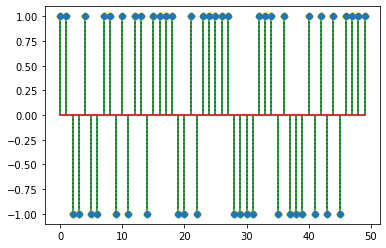

In [109]:
wb = np.array(res_scipy.x)
clfRes = decifun(X[N:])
plt.stem(Y[N:], use_line_collection=True, linefmt="b:", markerfmt="yD")
plt.stem(clfRes, use_line_collection=True, linefmt="g-")
plt.show()

## 实现

In [168]:
class LogisticReg:
    def __init__(self):
        self.w = None
        self.M = None

    def fit(self, X, Y):
        N = X.shape[0]
        self.M = X.shape[1]

        Y = 2 * Y - 1
        X_1 = np.concatenate((X, np.ones((N, 1))), axis=1)  # X 后面添加一排 1

        fun = lambda w: (-1 / N) * (np.log(Sigmod(Y * (w @ X_1.T)))).sum()

        w0 = np.zeros(self.M+1)
        self.w = minimize(fun, w0).x

    def predict(self, X, return_Prob=False):
        X_1 = np.concatenate((X, np.ones((len(X), 1))), axis=1)  # X 后面添加一排 1
        prob = Sigmod(self.w @ X_1.T)
        if return_Prob:
            return prob > 0.5, prob
        else:
            return prob > 0.5

## 测试

In [169]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [170]:
NoCatList = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=NoCatList)
temp = df.pop('HeartDisease')
df.insert(loc=df.shape[1], column='HeartDisease', value=temp, allow_duplicates=False)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,172,0.0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,156,1.0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,98,0.0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,108,1.5,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,122,0.0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [171]:
df = df.sample(frac=1)
# 前800个数据为训练集
TrainX = df.values[:800, :-1]
TrainY = df.values[:800, -1]
# 后118个数据为测试集
TestX = df.values[800:, :-1]
TestY = df.values[800:, -1]

In [172]:
clf = LogisticReg()
clf.fit(TrainX, TrainY)
PreY, ProbY = clf.predict(TestX, return_Prob=True)

In [173]:
mc.singleMetics(PreY, TestY)

{'TP': 47,
 'FP': 10,
 'FN': 11,
 'TN': 50,
 'Accuracy': 0.8220338983050848,
 'Precision': 0.8245614035087719,
 'Recall': 0.8103448275862069,
 'F1': 0.8173913043478261}

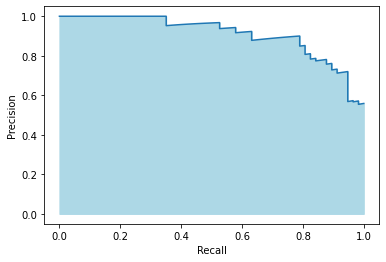

In [174]:
mc.PRcurve(ProbY, TestY, plot=True);

In [175]:
mc.AP(ProbY, TestY)

0.9031788181427135

In [176]:
mc.BEP(ProbY, TestY)

0.8103448275862069

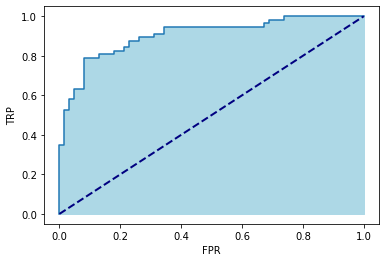

In [177]:
mc.ROCcurve(ProbY, TestY, plot=True);

In [178]:
mc.AUC(ProbY, TestY)

0.903652574058096

## Sklearn

<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>

In [179]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(TrainX, TrainY)
print('预测准确率：',clf.score(TestX, TestY))

预测准确率： 0.8135593220338984
